In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import plotly.express as px
import matplotlib.pyplot as plt

**Dataset adopted for this study: ** Tamal, Maruf Ahmed, Islam, M. K., Bhuiyan, T. and Sattar, A. (2024) “Dataset of suspicious phishing URL detection,” Frontiers in Computer Science, vol. 6 [Online]. DOI: 10.3389/fcomp.2024.1308634.

In [ ]:
# Load your dataset into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/Dataset.csv")

# Splitting data into features (X) and target (y)
X = data.drop("Type", axis=1)
y = data["Type"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


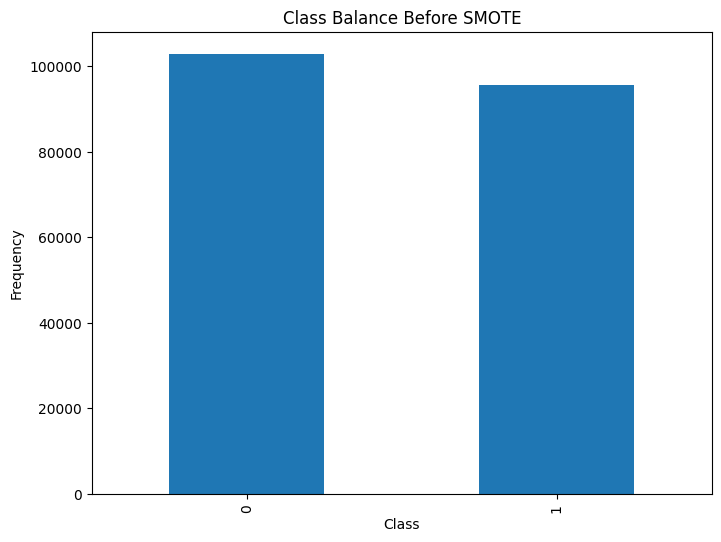

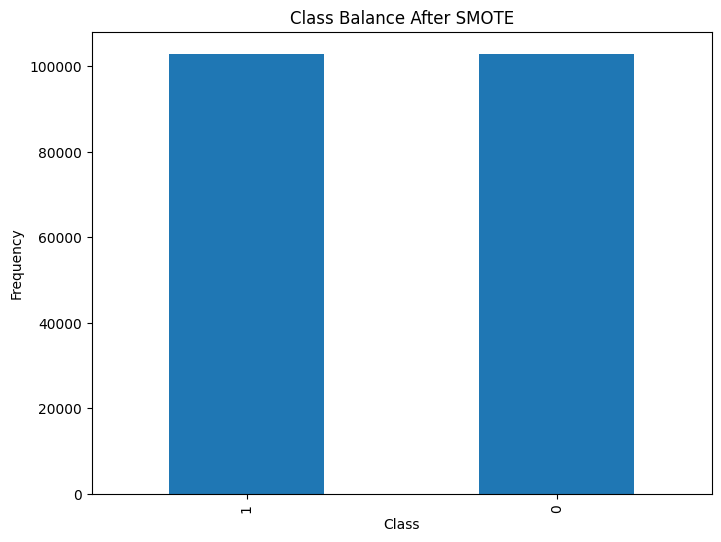

In [ ]:
# Visualize the class balance before applying SMOTE
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar')
plt.title('Class Balance Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Visualize the class balance after applying SMOTE
plt.figure(figsize=(8, 6))
y_train.value_counts().plot(kind='bar')
plt.title('Class Balance After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Apply univariate feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Get feature scores
feature_scores = selector.scores_

# Create a DataFrame for visualization
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Plot the feature scores using plotly
fig = px.bar(feature_scores_df,
             x='Score',
             y='Feature',
             orientation='h',
             title='Feature Importance Using Univariate Selection',
             labels={'Score': 'Importance Score', 'Feature': 'Features'},
             color='Score',
             color_continuous_scale=px.colors.sequential.Viridis)

# Customize the layout for publication
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    yaxis={'categoryorder':'total ascending'},
    template='simple_white',
    width=1000,
    height=800
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24 25 27 28 29 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Epoch 1/10
6430/6430 [==============================] - 14s 2ms/step - loss: 0.3835 - accuracy: 0.8289 - val_loss: 0.3215 - val_accuracy: 0.8630
Epoch 2/10
6430/6430 [==============================] - 13s 2ms/step - loss: 0.3368 - accuracy: 0.8536 - val_loss: 0.3116 - val_accuracy: 0.8681
Epoch 3/10
6430/6430 [==============================] - 13s 2ms/step - loss: 0.3257 - accuracy: 0.8593 - val_loss: 0.3005 - val_accuracy: 0.8729
Epoch 4/10
6430/6430 [==============================] - 12s 2ms/step - loss: 0.3194 - accuracy: 0.8626 - val_loss: 0.2984 - val_accuracy: 0.8741
Epoch 5/10
6430/6430 [==============================] - 12s 2ms/step - loss: 0.3146 - accuracy: 0.8644 - val_loss: 0.2904 - val_accuracy: 0.8777
Epoch 6/10
6430/6430 [==============================] - 12s 2ms/step - loss: 0.3119 - accuracy: 0.8661 - val_loss: 0.2970 - val_accuracy: 0.8718
Epoch 7/10
6430/6430 [==============================] - 13s 2ms/step - loss: 0.3094 - accuracy: 0.8674 - val_loss: 0.2933 - val_ac

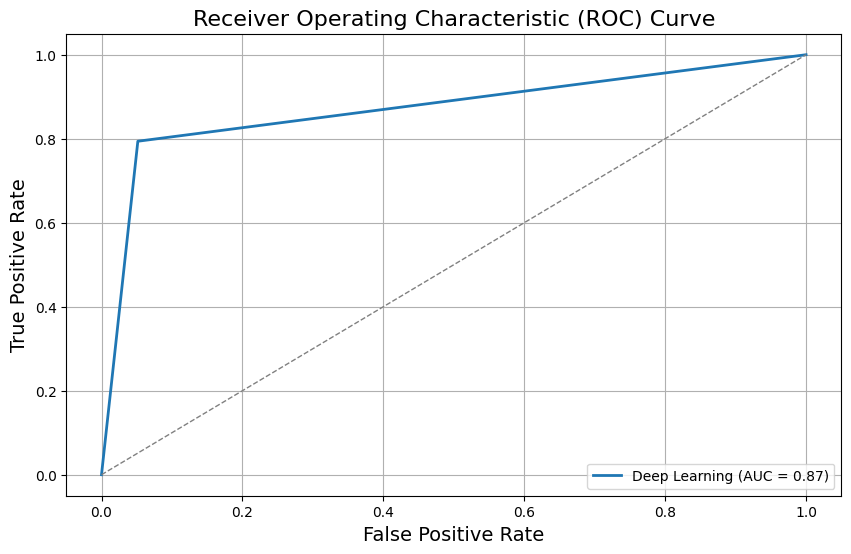

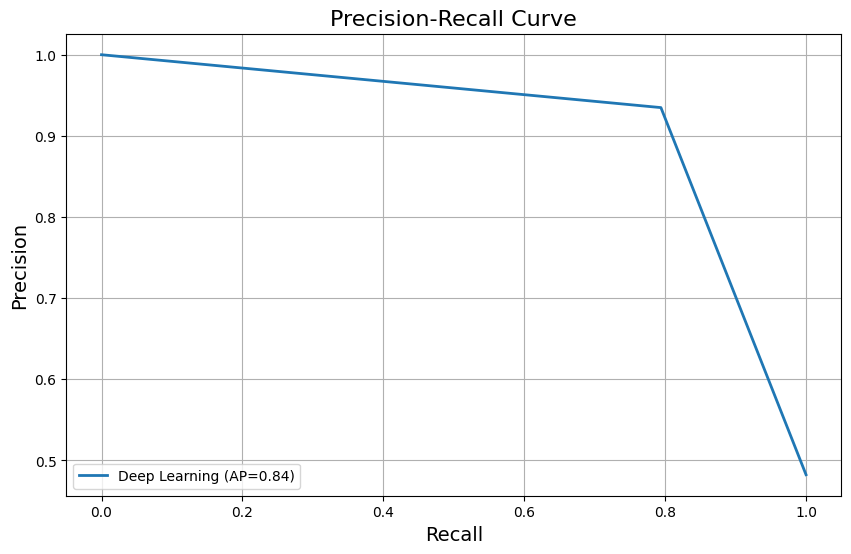

In [ ]:
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Build the Sequential model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

# Record training start time
training_start_time = time.time()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()

# Predict the test set
y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Record testing end time
testing_end_time = time.time()


# Perform cross-validation using KFold
kf = KFold(n_splits=5)
cv_scores_dl = []

for train_index, val_index in kf.split(X[selected_features]):
    # Modified: Use .iloc for DataFrame, revert to array indexing if NumPy
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Scale the train and validation data
    X_train_cv_scaled = scaler.fit_transform(X_train_cv[selected_features])
    X_val_cv_scaled = scaler.transform(X_val_cv[selected_features])

    # Train the model on the cross-validation split
    model.fit(X_train_cv_scaled, y_train_cv, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_val_cv_scaled, y_val_cv, verbose=0)
    cv_scores_dl.append(scores[1])  # Append accuracy

mean_cv_score_dl = np.mean(cv_scores_dl)

# Print classification report
print("Deep Learning Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_dl, digits=3))

# Print cross-validation score
print("Mean Cross-validation Score (Deep Learning): {:.4f}".format(mean_cv_score_dl))


# Print confusion matrix
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)
print("Confusion Matrix:")
print(conf_matrix_dl)

# Extract TP, TN, FP, FN from the confusion matrix
TP_dl = conf_matrix_dl[1, 1]
TN_dl = conf_matrix_dl[0, 0]
FP_dl = conf_matrix_dl[0, 1]
FN_dl = conf_matrix_dl[1, 0]

print("True Positives:", TP_dl)
print("True Negatives:", TN_dl)
print("False Positives:", FP_dl)
print("False Negatives:", FN_dl)

# Calculate and print training, testing, and execution time
training_time_dl = training_end_time - training_start_time
testing_time_dl = testing_end_time - testing_start_time
execution_time_dl = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time_dl))
print("Testing Time: {:.4f} seconds".format(testing_time_dl))
print("Total Execution Time: {:.4f} seconds".format(execution_time_dl))

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_dl)
auc_dl = auc(fpr_dl, tpr_dl)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {auc_dl:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_dl, recall_dl, _ = precision_recall_curve(y_test, y_pred_dl)
ap_dl = average_precision_score(y_test, y_pred_dl)

plt.figure(figsize=(10, 6))
plt.plot(recall_dl, precision_dl, label=f'Deep Learning (AP={ap_dl:.2f})', linewidth=2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
# Print classification report
print("Deep Learning Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_dl, digits=3))

Deep Learning Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.832     0.948     0.886     25668
           1      0.935     0.794     0.859     23922

    accuracy                          0.874     49590
   macro avg      0.883     0.871     0.872     49590
weighted avg      0.881     0.874     0.873     49590



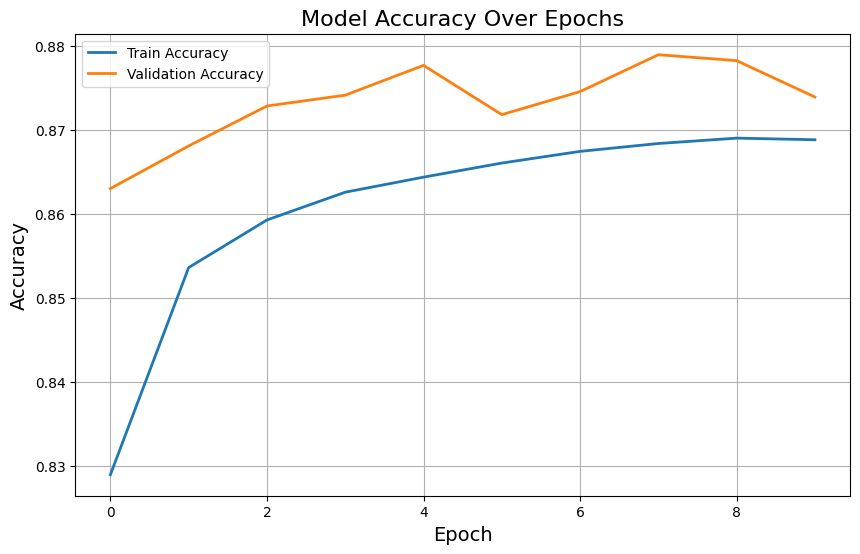

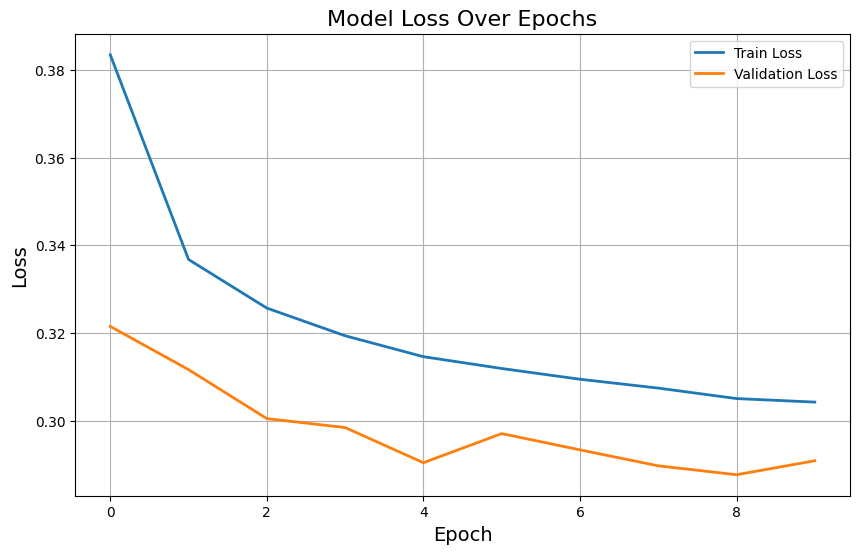

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


In [ ]:
pip install pydot graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model structure and save it to a file
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Random Forest Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.961     0.974     0.968     25668
           1      0.972     0.958     0.965     23922

    accuracy                          0.966     49590
   macro avg      0.967     0.966     0.966     49590
weighted avg      0.966     0.966     0.966     49590

Mean Cross-validation Score (Random Forest): 0.9661
Confusion Matrix:
[[25010   658]
 [ 1013 22909]]
True Positives: 22909
True Negatives: 25010
False Positives: 658
False Negatives: 1013
Training Time: 27.9066 seconds
Testing Time: 1.2219 seconds
Total Execution Time: 173.6119 seconds


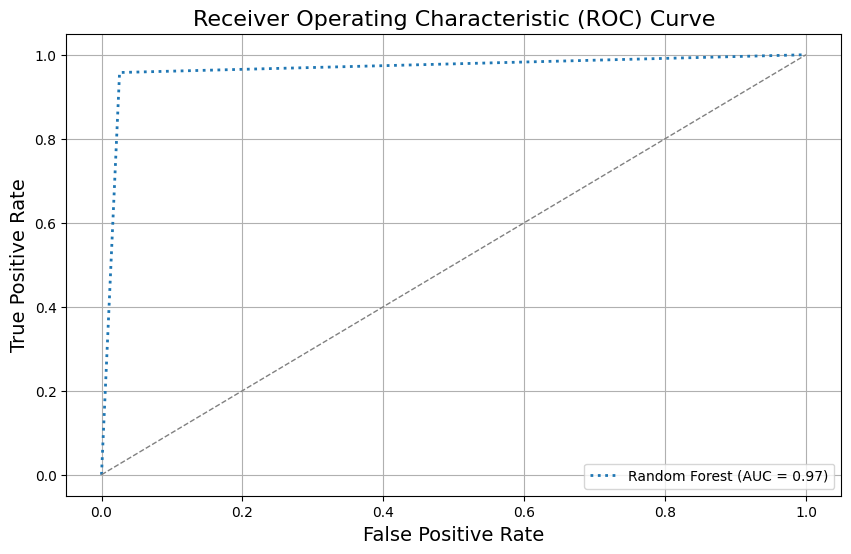

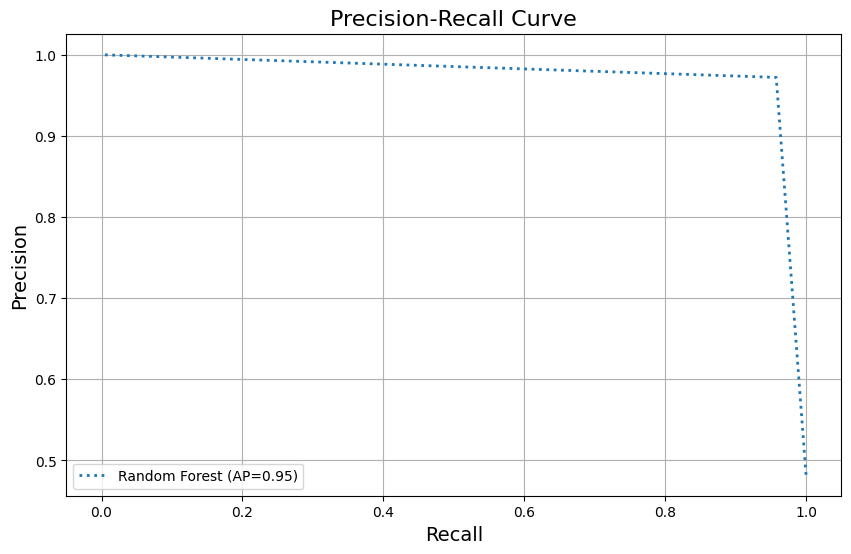

In [ ]:
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=None)

# Record training start time
training_start_time = time.time()
rf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_rf = rf.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for RandomForestClassifier
cv_scores_rf = cross_val_score(rf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_rf = np.mean(cv_scores_rf)

# Print classification report for the RandomForestClassifier
print("Random Forest Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_rf, digits=3))
print("Mean Cross-validation Score (Random Forest): {:.4f}".format(mean_cv_score_rf))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2, linestyle=':')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
ap_rf = average_precision_score(y_test, y_pred_rf)

# Plot precision-recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP={ap_rf:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()


Gradient Boosting Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.843     0.889     0.866     25668
           1      0.874     0.823     0.848     23922

    accuracy                          0.857     49590
   macro avg      0.859     0.856     0.857     49590
weighted avg      0.858     0.857     0.857     49590

Mean Cross-validation Score (Gradient Boosting): 0.8567
Confusion Matrix:
[[22824  2844]
 [ 4239 19683]]
True Positives: 19683
True Negatives: 22824
False Positives: 2844
False Negatives: 4239
Training Time: 34.5667 seconds
Testing Time: 0.0788 seconds
Total Execution Time: 198.6917 seconds


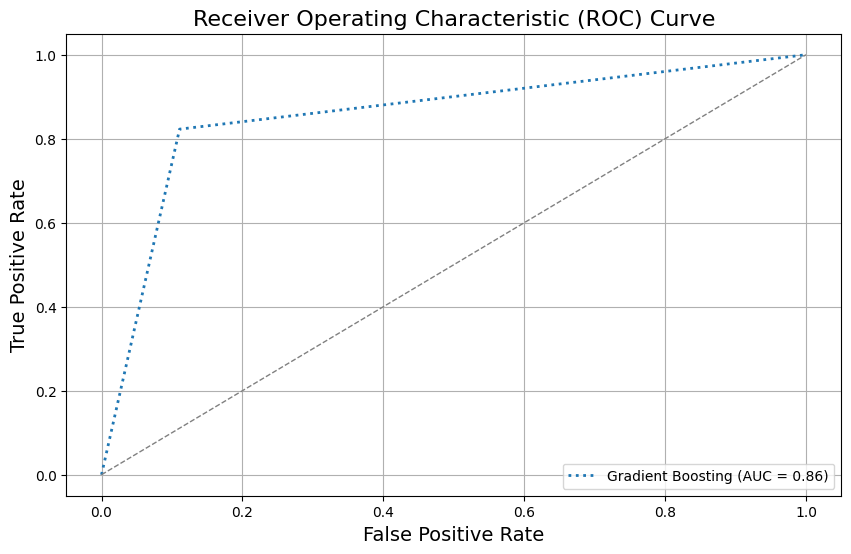

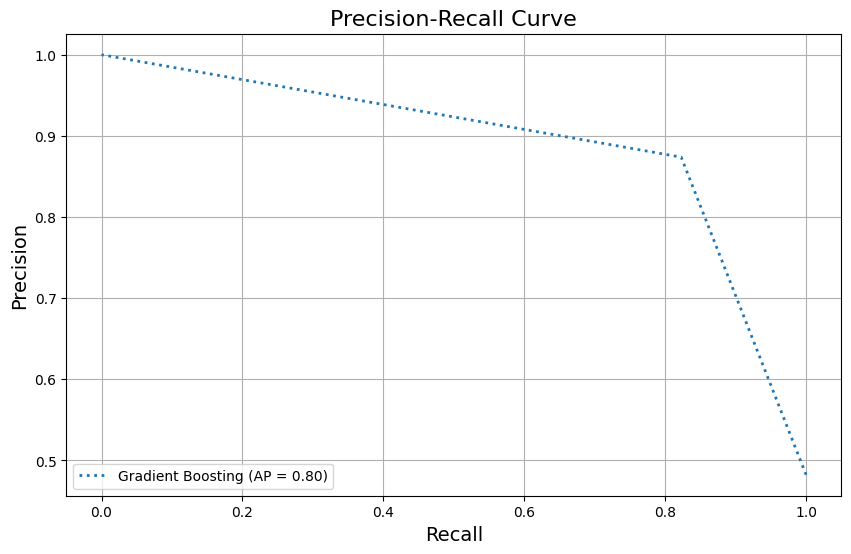

In [ ]:
import time
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize GradientBoostingClassifier with specified parameters
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None)

# Record training start time
training_start_time = time.time()
gbc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_gbc = gbc.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for GradientBoostingClassifier
cv_scores_gbc = cross_val_score(gbc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_gbc = np.mean(cv_scores_gbc)

# Print classification report for the GradientBoostingClassifier
print("Gradient Boosting Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_gbc, digits=3))
print("Mean Cross-validation Score (Gradient Boosting): {:.4f}".format(mean_cv_score_gbc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Gradient Boosting Classifier
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)
# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting (AUC = {auc_gbc:.2f})', linewidth=2, linestyle=':')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
# Gradient Boosting Classifier
precision_gbc, recall_gbc, _ = precision_recall_curve(y_test, y_pred_gbc)
avg_precision_gbc = average_precision_score(y_test, y_pred_gbc)
# Plot Precision-Recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_gbc, precision_gbc, label=f'Gradient Boosting (AP = {avg_precision_gbc:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()

AdaBoost Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.823     0.878     0.850     25668
           1      0.859     0.797     0.827     23922

    accuracy                          0.839     49590
   macro avg      0.841     0.838     0.838     49590
weighted avg      0.840     0.839     0.839     49590

Mean Cross-validation Score (AdaBoost): 0.8394
Confusion Matrix:
[[22538  3130]
 [ 4846 19076]]
True Positives: 19076
True Negatives: 22538
False Positives: 3130
False Negatives: 4846
Training Time: 15.3875 seconds
Testing Time: 0.4298 seconds
Total Execution Time: 94.9512 seconds


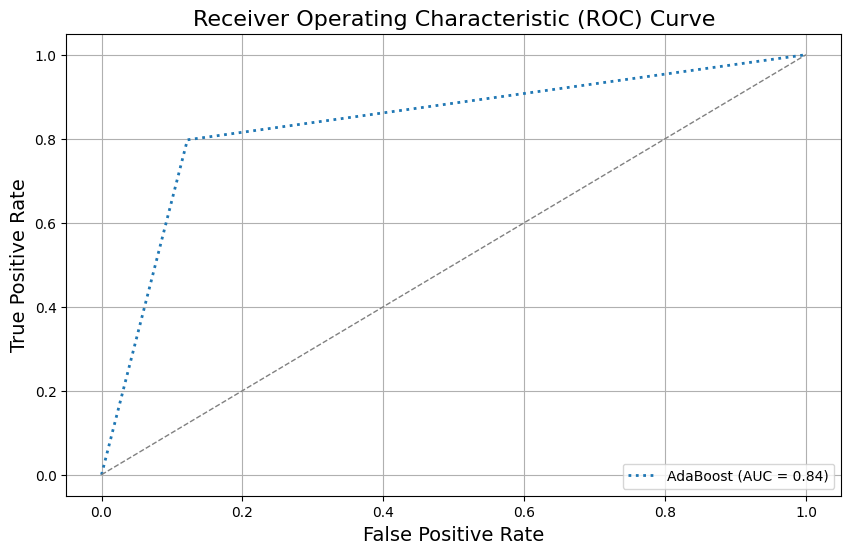

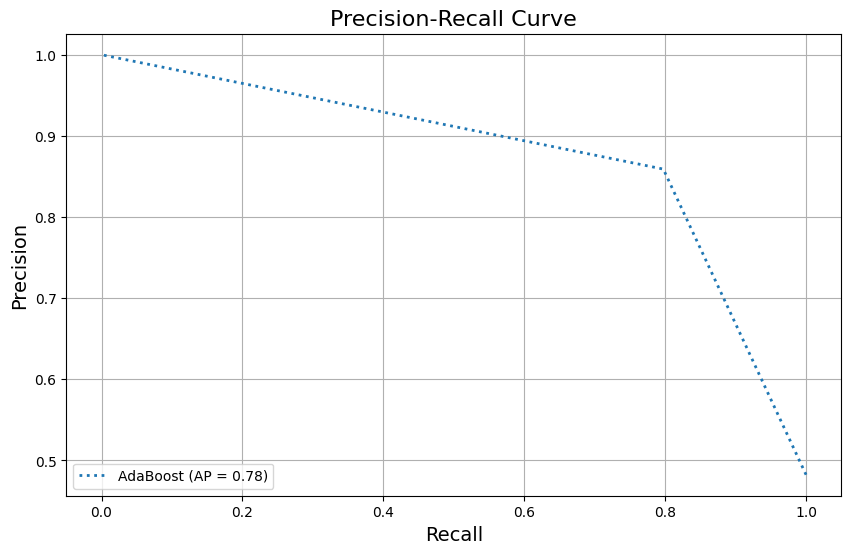

In [ ]:
import time
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize AdaBoostClassifier with specified parameters
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=None)

# Record training start time
training_start_time = time.time()
abc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_abc = abc.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for AdaBoostClassifier
cv_scores_abc = cross_val_score(abc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_abc = np.mean(cv_scores_abc)

# Print classification report for the AdaBoostClassifier
print("AdaBoost Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_abc, digits=3))
print("Mean Cross-validation Score (AdaBoost): {:.4f}".format(mean_cv_score_abc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_abc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# AdaBoost
fpr_abc, tpr_abc, _ = roc_curve(y_test, y_pred_abc)
auc_abc = auc(fpr_abc, tpr_abc)
# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_abc, tpr_abc, label=f'AdaBoost (AUC = {auc_abc:.2f})', linewidth=2, linestyle=':')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
# AdaBoost
precision_abc, recall_abc, _ = precision_recall_curve(y_test, y_pred_abc)
avg_precision_abc = average_precision_score(y_test, y_pred_abc)
# Plot Precision-Recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_abc, precision_abc, label=f'AdaBoost (AP = {avg_precision_abc:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()

Voting Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.862     0.982     0.918     25668
           1      0.978     0.831     0.898     23922

    accuracy                          0.909     49590
   macro avg      0.920     0.907     0.908     49590
weighted avg      0.918     0.909     0.908     49590

Mean Cross-validation Score (Voting Classifier): 0.9069
Confusion Matrix:
[[25213   455]
 [ 4048 19874]]
True Positives: 19874
True Negatives: 25213
False Positives: 455
False Negatives: 4048
Training Time: 93.2105 seconds
Testing Time: 3.5290 seconds
Total Execution Time: 579.1496 seconds


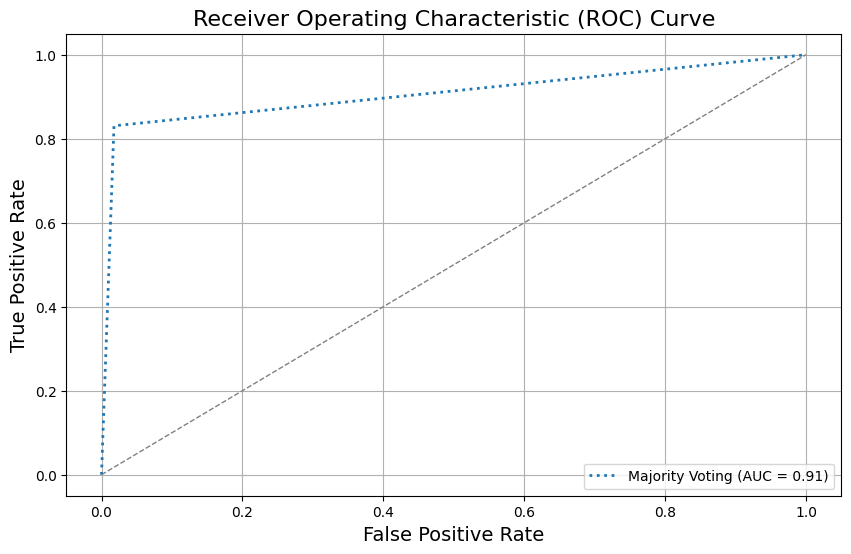

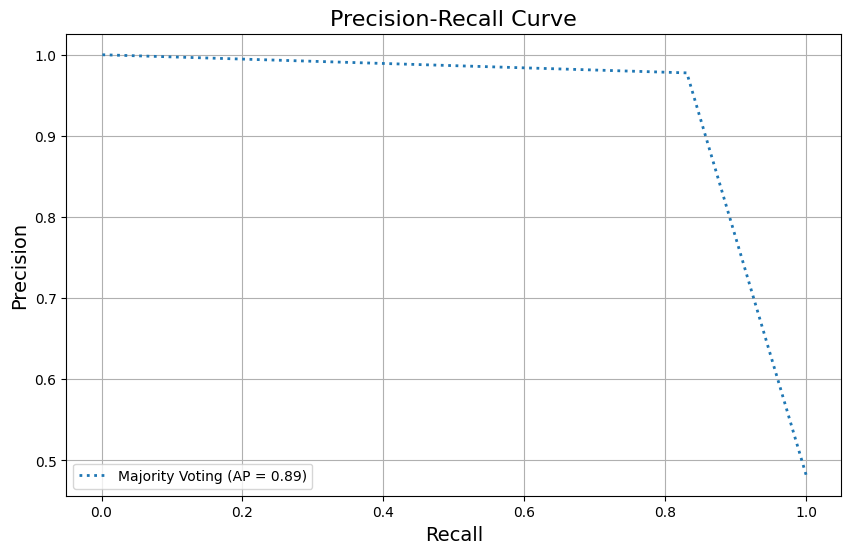

In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize individual classifiers with specified parameters
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=None)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None)
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=None)
etc = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=None)

# Initialize the VotingClassifier with the individual classifiers
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gbc', gbc), ('abc', abc), ('etc', etc)], voting='hard')

# Record training start time
training_start_time = time.time()
voting_clf.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_voting = voting_clf.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for VotingClassifier
cv_scores_voting = cross_val_score(voting_clf, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_voting = np.mean(cv_scores_voting)

# Print classification report for the VotingClassifier
print("Voting Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_voting, digits=3))
print("Mean Cross-validation Score (Voting Classifier): {:.4f}".format(mean_cv_score_voting))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Majority Voting
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_voting)
auc_voting = auc(fpr_voting, tpr_voting)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Majority Voting (AUC = {auc_voting:.2f})', linewidth=2, linestyle=':')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Majority Voting
precision_voting, recall_voting, _ = precision_recall_curve(y_test, y_pred_voting)
avg_precision_voting = average_precision_score(y_test, y_pred_voting)

# Plot Precision-Recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_voting, precision_voting, label=f'Majority Voting (AP = {avg_precision_voting:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()

Extra Trees Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.959     0.975     0.967     25668
           1      0.973     0.955     0.964     23922

    accuracy                          0.966     49590
   macro avg      0.966     0.965     0.965     49590
weighted avg      0.966     0.966     0.966     49590

Mean Cross-validation Score (Extra Trees): 0.9647
Confusion Matrix:
[[25031   637]
 [ 1072 22850]]
True Positives: 22850
True Negatives: 25031
False Positives: 637
False Negatives: 1072
Training Time: 17.2559 seconds
Testing Time: 1.6232 seconds
Total Execution Time: 109.9083 seconds


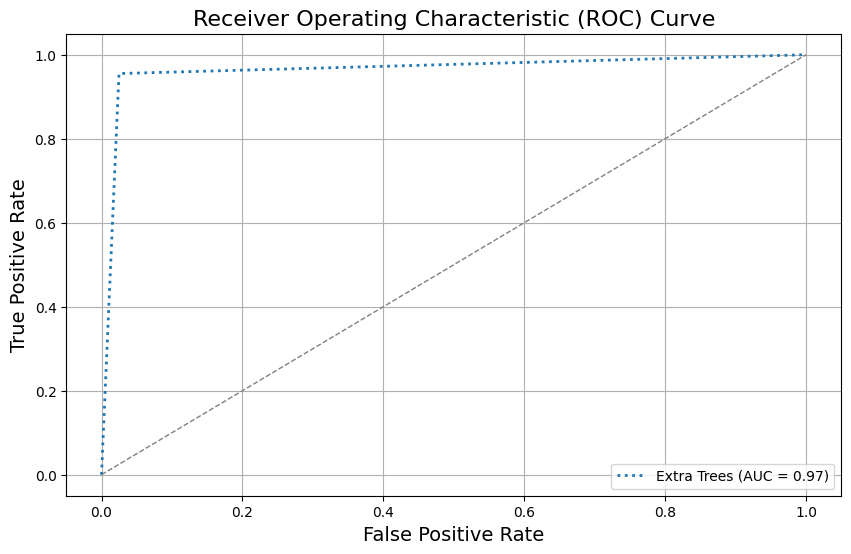

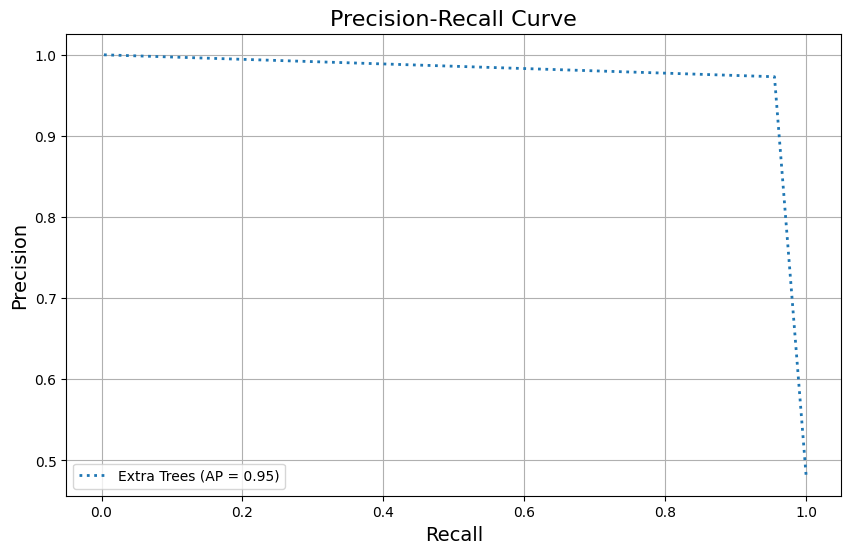

In [ ]:
import time
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize ExtraTreesClassifier with specified parameters
etc = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=None)

# Record training start time
training_start_time = time.time()
etc.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_etc = etc.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for ExtraTreesClassifier
cv_scores_etc = cross_val_score(etc, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_etc = np.mean(cv_scores_etc)

# Print classification report for the ExtraTreesClassifier
print("Extra Trees Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_etc, digits=3))
print("Mean Cross-validation Score (Extra Trees): {:.4f}".format(mean_cv_score_etc))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_etc)
print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Extra Trees Classifier
fpr_etc, tpr_etc, _ = roc_curve(y_test, y_pred_etc)
auc_etc = auc(fpr_etc, tpr_etc)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(fpr_etc, tpr_etc, label=f'Extra Trees (AUC = {auc_etc:.2f})', linewidth=2, linestyle=':')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Extra Trees Classifier
precision_etc, recall_etc, _ = precision_recall_curve(y_test, y_pred_etc)
avg_precision_etc = average_precision_score(y_test, y_pred_etc)

# Plot Precision-Recall curves for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(recall_etc, precision_etc, label=f'Extra Trees (AP = {avg_precision_etc:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()


MLP Classifier with Selected Features Report:
              precision    recall  f1-score   support

           0      0.863     0.935     0.897     25668
           1      0.923     0.840     0.880     23922

    accuracy                          0.889     49590
   macro avg      0.893     0.888     0.889     49590
weighted avg      0.892     0.889     0.889     49590

Mean Cross-validation Score (MLP): 0.8868
Confusion Matrix:
[[23999  1669]
 [ 3820 20102]]
True Positives: 20102
True Negatives: 23999
False Positives: 1669
False Negatives: 3820
Training Time: 736.5055 seconds
Testing Time: 0.0438 seconds
Total Execution Time: 3667.6974 seconds


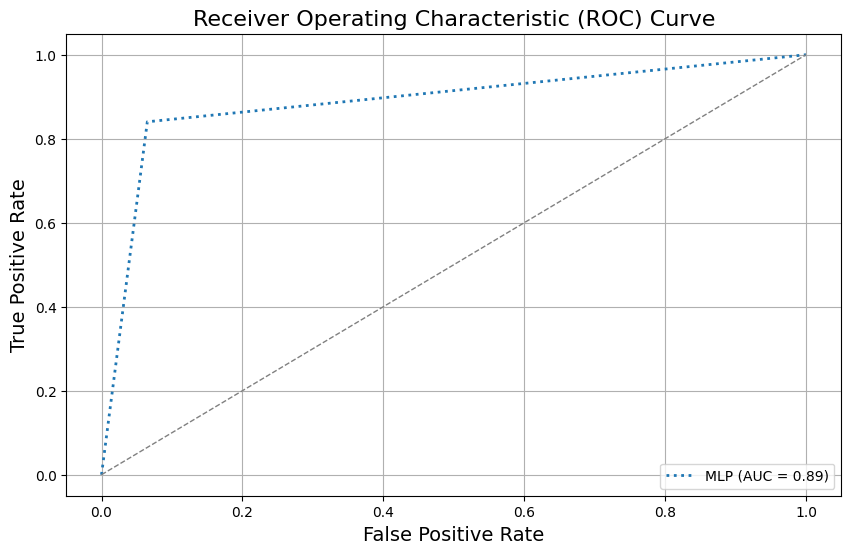

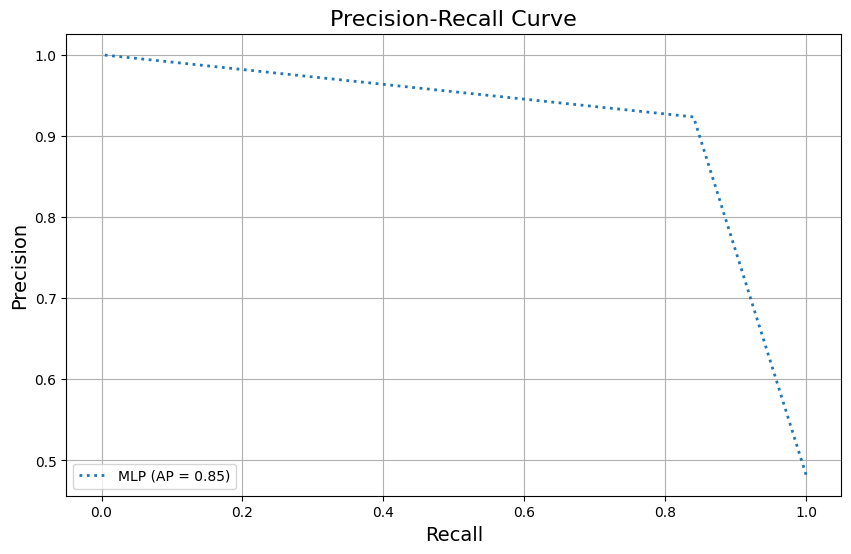

In [ ]:
import time
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Select top 25 features
selected_features = feature_scores_df.nlargest(25, 'Score')['Feature'].values

# Record start time
start_time = time.time()

# Initialize MLPClassifier with specified parameters
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=None)

# Record training start time
training_start_time = time.time()
mlp.fit(X_train[selected_features], y_train)
# Record training end time
training_end_time = time.time()

# Record testing start time
testing_start_time = time.time()
y_pred_mlp = mlp.predict(X_test[selected_features])
# Record testing end time
testing_end_time = time.time()

# Perform k-fold cross-validation for MLPClassifier
cv_scores_mlp = cross_val_score(mlp, X[selected_features], y, cv=5)  # 5-fold cross-validation
mean_cv_score_mlp = np.mean(cv_scores_mlp)

# Print classification report for the MLPClassifier
print("MLP Classifier with Selected Features Report:")
print(classification_report(y_test, y_pred_mlp, digits=3))
print("Mean Cross-validation Score (MLP): {:.4f}".format(mean_cv_score_mlp))

# Print confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix_mlp)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix_mlp[1, 1]  # True Positives
TN = conf_matrix_mlp[0, 0]  # True Negatives
FP = conf_matrix_mlp[0, 1]  # False Positives
FN = conf_matrix_mlp[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Calculate and print training, testing, and execution time
training_time = training_end_time - training_start_time
testing_time = testing_end_time - testing_start_time
execution_time = time.time() - start_time

print("Training Time: {:.4f} seconds".format(training_time))
print("Testing Time: {:.4f} seconds".format(testing_time))
print("Total Execution Time: {:.4f} seconds".format(execution_time))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)
# Plot ROC curve for MLP
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})', linewidth=2, linestyle=':')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
# MLP
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_pred_mlp)
avg_precision_mlp = average_precision_score(y_test, y_pred_mlp)
# Plot Precision-Recall curve for MLP
plt.figure(figsize=(10, 6))
plt.plot(recall_mlp, precision_mlp, label=f'MLP (AP = {avg_precision_mlp:.2f})', linewidth=2, linestyle=':')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=10, loc='lower left')
plt.grid(True)
plt.show()
